# Практическая работа 3: Анализ данных interest payments for bank client

## Задание 
**Цель:** calculate interest payment for client:
- **Файл 1 (CSV):** client (client_id, age, credit_score)
- **Файл 2 (Excel):** credit (client_id, credit_amount)
- **Файл 3 (JSON):** percent (credit_score_range, interest_rate)

## Библиотеки и подключения


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Библиотеки загружены")


✓ Библиотеки загружены


## 1. Загрузка данных из различных источников


In [7]:
# Загрузка данных об авиакомпаниях (CSV)
df_client = pd.read_csv('data/client.csv')
print("Данные об авиакомпаниях (CSV):")
print(f"Форма данных: {df_client.shape}")
print(df_client.head())
print("\n" + "="*50 + "\n")


Данные об авиакомпаниях (CSV):
Форма данных: (1000, 3)
     client_id  age  credit_score
0  client00001   58           214
1  client00002   19           381
2  client00003   33           328
3  client00004   26           204
4  client00005   61           658




In [8]:
# Загрузка данных о рейсах (Excel)
df_credits = pd.read_excel('data/credits.xlsx')
print("Данные о рейсах (Excel):")
print(f"Форма данных: {df_credits.shape}")
print(df_credits.head())
print("\n" + "="*50 + "\n")


Данные о рейсах (Excel):
Форма данных: (1000, 2)
     client_id  credit_amount
0  client00001         239722
1  client00002         273232
2  client00003         222114
3  client00004         287592
4  client00005          89749




In [15]:
# Загрузка данных о билетах (JSON)
with open('data/rates.json', 'r', encoding='utf-8') as f:
    rates_data = json.load(f)

df_rates = pd.DataFrame(rates_data)
print("Данные о rates (JSON):")
print(f"Форма данных: {df_rates.shape}")
print(df_rates.head())
print("\n" + "="*50 + "\n")


Данные о rates (JSON):
Форма данных: (5, 2)
  credit_score_range  interest_rate
0            100-300          20.35
1            300-500          13.62
2            500-700           9.81
3            700-800           6.74
4            800-850           2.35




## 2. Консолидация данных и расчет выручки


In [19]:
# Объединение всех данных
# Шаг 1: Объединение рейсов с билетами
df = pd.merge(df_client, df_credits, on='client_id', how='inner')



In [20]:
#dobavlayem procentnyu stavky podhodashyu pod credit_score
def find_rate(score):
    for r in df_rates.itertuples(index=False):
        low, high = map(int, r.credit_score_range.split('-'))
        if low <=score <= high:
            return r.interest_rate

df['interest_rate'] = df['credit_score'].apply(find_rate)
print(df.head())


     client_id  age  credit_score  credit_amount  interest_rate
0  client00001   58           214         239722          20.35
1  client00002   19           381         273232          13.62
2  client00003   33           328         222114          13.62
3  client00004   26           204         287592          20.35
4  client00005   61           658          89749           9.81


In [21]:
df.head()

,client_id,age,credit_score,credit_amount,interest_rate
0,client00001,58,214,239722,20.35
1,client00002,19,381,273232,13.62
2,client00003,33,328,222114,13.62
3,client00004,26,204,287592,20.35
4,client00005,61,658,89749,9.81


In [23]:
#calculate annual interest payment 
# annual interest payment = credit_amount * interest_rate

df['annual_interest_payment'] = (df['credit_amount']*df['interest_rate']/100).round(1)
df.head()

,client_id,age,credit_score,credit_amount,interest_rate,annual_interest_payment
0,client00001,58,214,239722,20.35,48783.4
1,client00002,19,381,273232,13.62,37214.2
2,client00003,33,328,222114,13.62,30251.9
3,client00004,26,204,287592,20.35,58525.0
4,client00005,61,658,89749,9.81,8804.4


## 3. Визуализация результатов


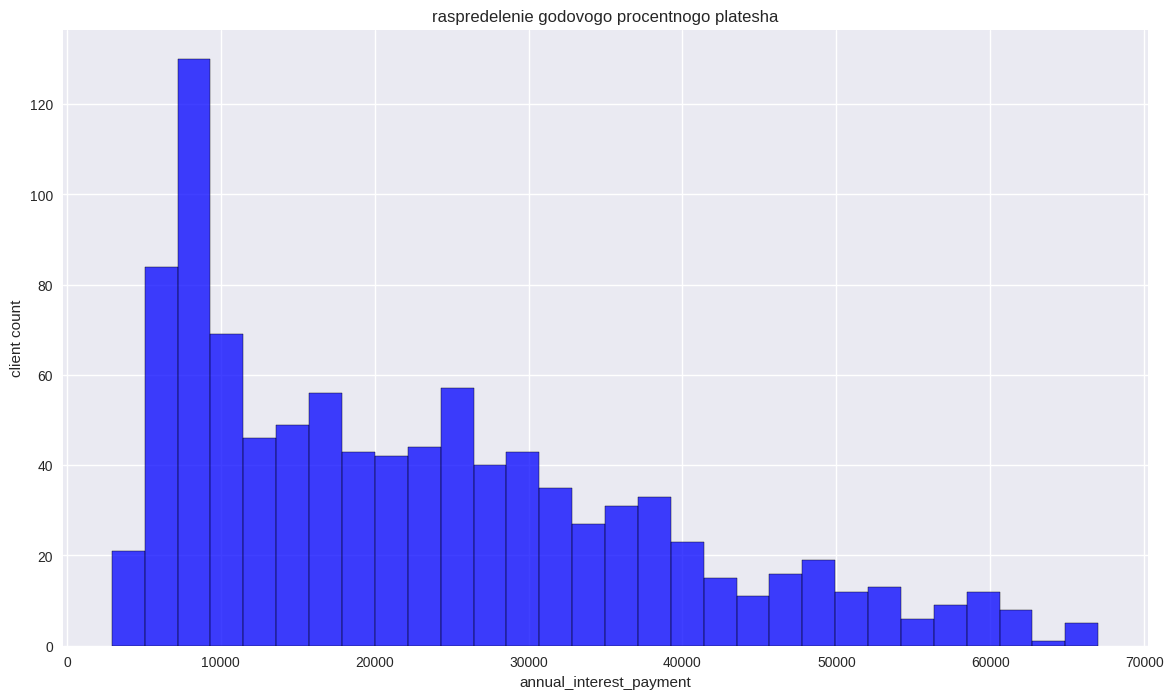

In [26]:
# График 1: Общая выручка авиакомпаний
plt.figure(figsize=(14, 8))
sns.histplot(df['annual_interest_payment'], bins = 30 ,color ='blue')
plt.title("raspredelenie godovogo procentnogo platesha")
plt.xlabel('annual_interest_payment')
plt.ylabel('client count')
plt.show()

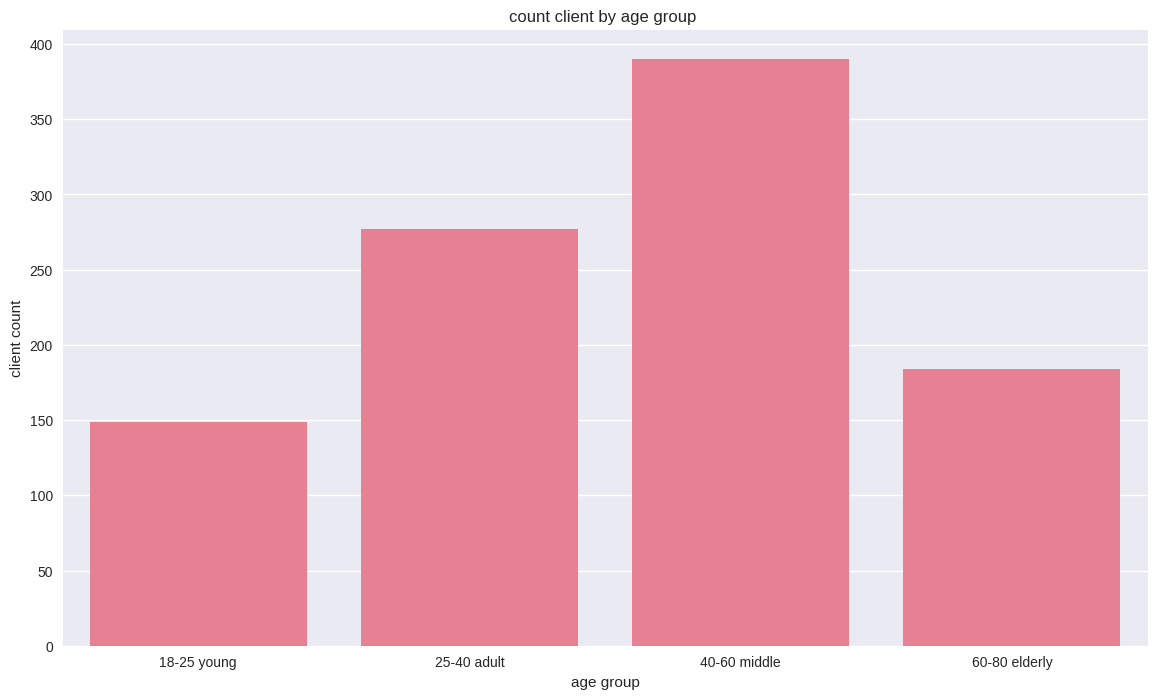

In [29]:
# График 2: raspredelenie vozrastnyh group
bins = [18,25,40,60,80]
labels = ['18-25 young','25-40 adult','40-60 middle','60-80 elderly']
df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels,include_lowest=True)

age_count = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(14,8))
sns.barplot(x=age_count.index, y=age_count.values)
plt.title("count client by age group ")
plt.xlabel("age group")
plt.ylabel("client count")
plt.show()

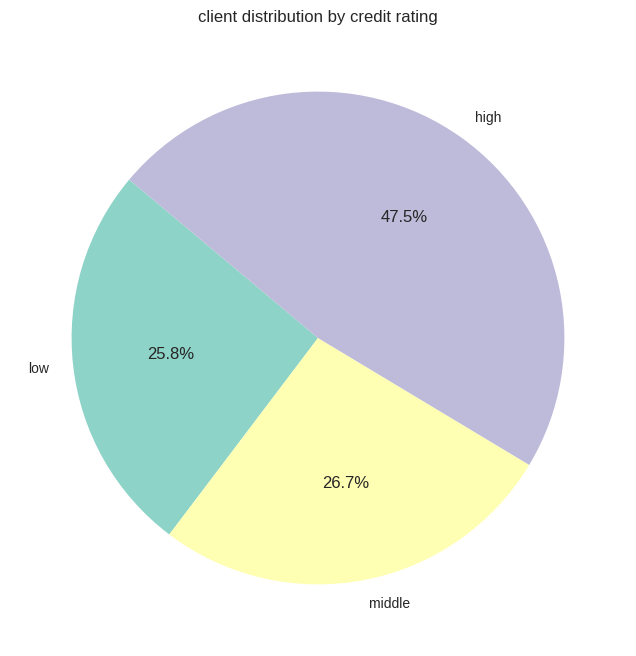

In [37]:
# График 3:  
#create credit rating category
bins = [100,300,500,850]
labels = ['low','middle','high']
df['credit_category'] = pd.cut(df['credit_score'], bins = bins, labels=labels,right= False)

#calculate client count in every category
credit_counts = df['credit_category'].value_counts().sort_index()
# krygovay diagramma diapozon creditnogo reytinga
plt.figure(figsize=(14,8))
plt.pie(credit_counts,labels=credit_counts.index,autopct='%1.1f%%',startangle=140,colors=plt.cm.Set3.colors)
plt.title("client distribution by credit rating")
plt.show()

## 4. Выводы и сохранение результатов


In [39]:
# Формирование выводов и сохранение результатов
print("ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА")
print("=" * 50)

# 1. client with max credit limit
top_client_idx = df['credit_amount'].idxmax()
top_client_id = df.loc[top_client_idx, 'client_id']
top_credit_amount = df.loc[top_client_idx, 'credit_amount']

print(f"1. client with the biggest credit: {top_client_id}")
print(f"   - sum credit: {top_credit_amount:,.0f} руб.")

# 2. total sum credit
total_credit_amount = df['credit_amount'].sum()
print(f"\n2. total sum credit: {total_credit_amount:,.0f} руб.")

# 3. client count 
total_clients = df['client_id'].nunique()
print(f"3. client count: {total_clients}")

# 4. average client credit and average credit rating
average_credit = df['credit_amount'].mean()
average_score = df['credit_score'].mean()
print(f"4. average client credit  : {average_credit:,.0f} руб.")
print(f"   average credit rating: {average_score:.0f}")

# 5. top-3 clients by credit sum
top_clients = df.nlargest(3, 'credit_amount')
print("\n5. top-3 client by sum rating:")
for i, row in enumerate(top_clients.itertuples(), 1):
    print(f"   {i}. client {row.client_id}: {row.credit_amount:,.0f} rub. (credit rating: {row.credit_score})")


df.to_csv('data/client_data_consolidated.csv', index=False)
print("\n" + "=" * 50)
print("✓ Результаты сохранены в папке 'data/'")
print("✓ Анализ завершен успешно!")

ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА
1. client with the biggest credit: client00474
   - sum credit: 994,253 руб.

2. total sum credit: 207,428,358 руб.
3. client count: 1000
4. average client credit  : 207,428 руб.
   average credit rating: 476

5. top-3 client by sum rating:
   1. client client00474: 994,253 rub. (credit rating: 779)
   2. client client00866: 989,587 rub. (credit rating: 791)
   3. client client00146: 986,982 rub. (credit rating: 789)

✓ Результаты сохранены в папке 'data/'
✓ Анализ завершен успешно!
